In [37]:
from pycisTopic.clust_vis import (
    find_clusters,
    run_umap,
    run_tsne,
    plot_metadata,
    plot_topic,
)
import os
import glob
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display
import math

%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [38]:
samples = [
    x.split("/")[-1].split("__")[0]
    for x in sorted(glob.glob("cistopic_objects/*singlets*model*topics.pkl"))
]
if len(samples) > len(set(samples)):
    print("samples are not unique!")
else:
    print("samples are unique.")

samples are unique.


In [39]:
cto_model_path_dict = {
    x.split("/")[-1].split("__")[0]: x
    for x in sorted(glob.glob("cistopic_objects/*singlets*topics.pkl"))
}
cto_model_path_dict

{'master_celltypefair_1.FIXEDCELLS': 'cistopic_objects/master_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_28topics.pkl'}

master_celltypefair_1.FIXEDCELLS
	cistopic_objects/master_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_28topics.dimreduc.pkl exists, skipping


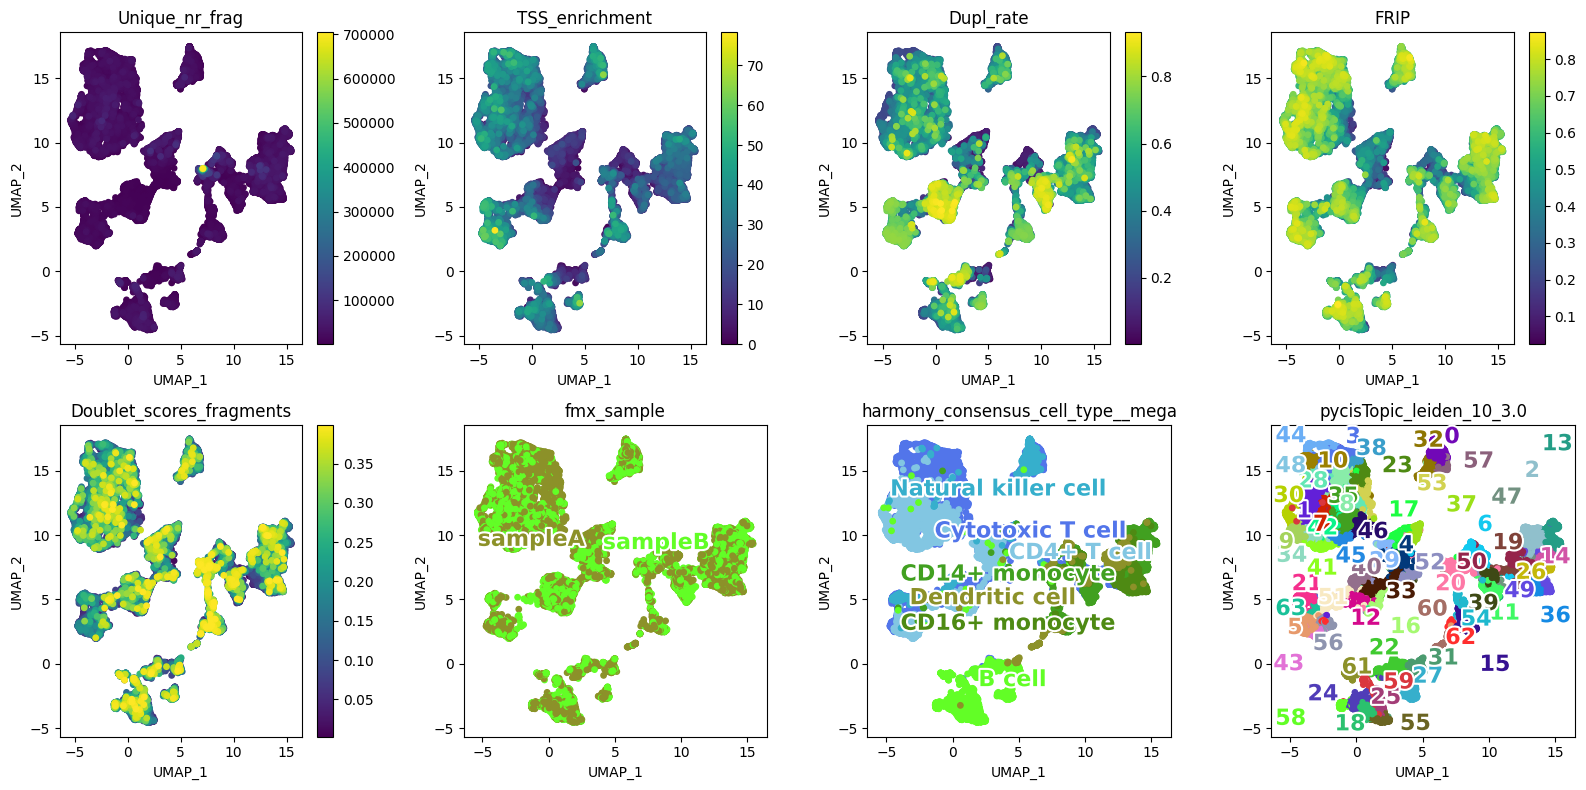

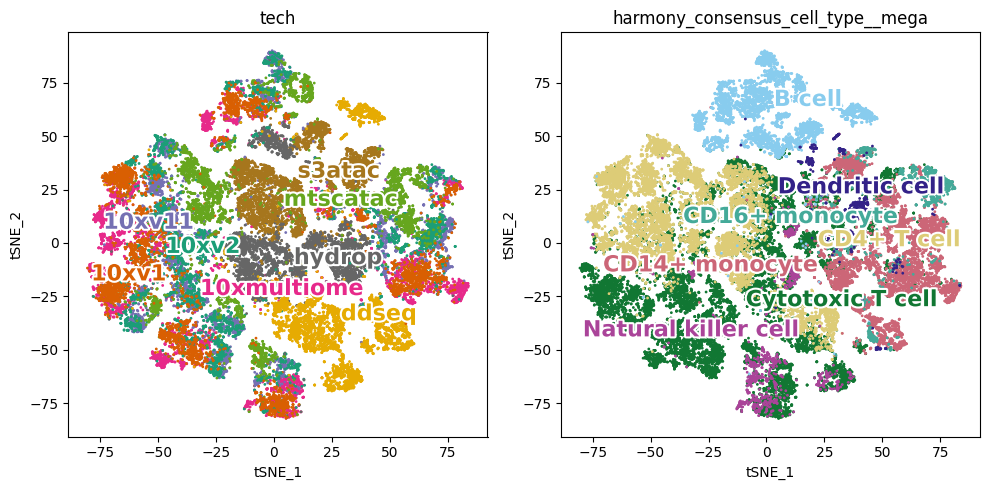

In [5]:
leiden_res = [3.0]
to_plot_leiden = ["pycisTopic_leiden_10_" + str(x) for x in leiden_res]

to_plot_vars = [
    "Unique_nr_frag",
    "TSS_enrichment",
    "Dupl_rate",
    "FRIP",
    "Doublet_scores_fragments",
    "fmx_sample",
    "harmony_consensus_cell_type__mega",
]

for sample in cto_model_path_dict.keys():
    # for sample in ['VIB_hydrop_1.FIXEDCELLS']:
    to_plot = to_plot_vars + to_plot_leiden

    print(sample)
    cto_path = cto_model_path_dict[sample]
    cto_path_new = cto_path.replace(".pkl", ".dimreduc.pkl")

    if not os.path.exists(cto_path_new):
        with open(cto_path, "rb") as f:
            cto = pickle.load(f)

        cto.cell_names = cto.cell_data.index

        cto.projections["cell"] = {}
        find_clusters(cto, target="cell", k=10, res=leiden_res, prefix="pycisTopic_")
        run_umap(cto, target="cell")
        run_tsne(cto, target="cell")

        if not "fmx_sample" in cto.cell_data.columns:
            to_plot.remove("fmx_sample")

        n_to_plot = len(to_plot)
        n_cols = 4
        n_rows = math.ceil(n_to_plot / n_cols)

        plot_metadata(
            cto,
            reduction_name="UMAP",
            variables=to_plot,
            target="cell",
            num_columns=4,
            text_size=16,
            dot_size=15,
            figsize=(n_cols * 4, n_rows * 4),
            save=f"plots_qc/{sample}__umap_summary.png",
        )

        plot_metadata(
            cto,
            reduction_name="tSNE",
            variables=to_plot,
            target="cell",
            num_columns=4,
            text_size=16,
            dot_size=15,
            figsize=(n_cols * 4, n_rows * 4),
            save=f"plots_qc/{sample}__tsne_summary.png",
        )

        with open(cto_path_new, "wb") as f:
            pickle.dump(cto, f, protocol=4)

    else:
        print(f"\t{cto_path_new} exists, skipping")

        umap_path = f"plots_qc/{sample}__umap_summary.png"
        tsne_path = f"plots_qc/{sample}__tsne_summary.png"

        if os.path.exists(umap_path):
            display(Image(umap_path))

        else:
            with open(cto_path_new, "rb") as f:
                cto = pickle.load(f)

            if not "fmx_sample" in cto.cell_data.columns:
                to_plot.remove("fmx_sample")

            n_to_plot = len(to_plot)
            n_cols = 4
            n_rows = math.ceil(n_to_plot / n_cols)

            plot_metadata(
                cto,
                reduction_name="UMAP",
                variables=to_plot,
                target="cell",
                num_columns=4,
                text_size=16,
                dot_size=15,
                figsize=(n_cols * 4, n_rows * 4),
                save=f"plots_qc/{sample}__umap_summary.png",
            )

        if os.path.exists(tsne_path):
            display(Image(tsne_path))

        else:
            with open(cto_path_new, "rb") as f:
                cto = pickle.load(f)

            n_to_plot = len(to_plot)
            n_cols = 4
            n_rows = math.ceil(n_to_plot / n_cols)

            plot_metadata(
                cto,
                reduction_name="tSNE",
                variables=to_plot,
                target="cell",
                num_columns=4,
                text_size=16,
                dot_size=15,
                figsize=(n_cols * 4, n_rows * 4),
                save=f"plots_qc/{sample}__tsne_summary.png",
            )

# check integration/LISI

In [40]:
with open(
    "cistopic_objects/master_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_28topics.dimreduc.pkl",
    "rb",
) as f:
    cto = pickle.load(f)

In [41]:
cto.cell_data

,seurat_cell_type_pred_score,seurat_cell_type_pred_score__mega,cisTopic_nr_frag,Log_unique_nr_frag_in_regions,Total_nr_frag_in_regions,centre_tech,Unique_nr_frag,seurat_cell_type__mega,fmx_droplet_type,harmony_pycisTopic_leiden_10_3.0,...,fmx_sample,harmony_consensus_cell_type__mega,cisTopic_nr_acc,cell_type__mega,sample_id,Doublet_scores_fragments,cisTopic_log_nr_frag,consensus_cell_type_individual,tech,pycisTopic_leiden_10_3.0
GAAGCAGCGGAATGATGCTCGTTCCAAT___OHS_s3atac_1.FIXEDCELLS,0.748176,0.343245,3320,8.007700,3130,OHS_s3atac,8595,B cell,SNG,76,...,sampleB,Cytotoxic T cell,2994,B cell,OHS_s3atac_1.FIXEDCELLS,0.132839,3.521138,CD4+ T cell,s3atac,29
AGGCAGAATGGTATTATTGGTCACGA___OHS_s3atac_2.FIXEDCELLS,0.286338,0.409355,723,5.916202,391,OHS_s3atac,1590,Cytotoxic T cell,NaN,27,...,NaN,Cytotoxic T cell,125,Cytotoxic T cell,OHS_s3atac_2.FIXEDCELLS,0.006511,2.859138,Cytotoxic T cell,s3atac,4
ATTGAGGAGCCAAGGCAAAGTACTCC___OHS_s3atac_2.FIXEDCELLS,0.295715,0.348566,939,6.598509,773,OHS_s3atac,8743,B cell,NaN,56,...,NaN,Cytotoxic T cell,690,B cell,OHS_s3atac_2.FIXEDCELLS,0.14158,2.972666,Cytotoxic T cell,s3atac,4
CTCTCTACTGAACGGCGTATCTGCCA___OHS_s3atac_2.FIXEDCELLS,0.375318,0.416923,774,6.212606,521,OHS_s3atac,1589,Cytotoxic T cell,NaN,5,...,NaN,Cytotoxic T cell,470,Cytotoxic T cell,OHS_s3atac_2.FIXEDCELLS,0.043544,2.888741,Cytotoxic T cell,s3atac,33
GAAGAGTATTGGCATAACCGCGCCGATC___OHS_s3atac_1.FIXEDCELLS,0.642647,0.328408,3793,8.146709,3643,OHS_s3atac,14741,Cytotoxic T cell,SNG,34,...,sampleA,Cytotoxic T cell,3465,Cytotoxic T cell,OHS_s3atac_1.FIXEDCELLS,0.156882,3.578983,CD4+ T cell,s3atac,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGATGCACAAGATTAG___VIB_10xv1_2.FIXEDCELLS,NaN,0.815577,13933,9.296793,13524,VIB_10xv1,20608,Dendritic cell,SNG,28,...,sampleB,Dendritic cell,12028,Dendritic cell,VIB_10xv1_2.FIXEDCELLS,0.154554,4.144045,NaN,10xv1,50
AAAGGATTCCACACCT___VIB_10xv1_2.FIXEDCELLS,0.546001,0.714484,11304,9.290075,13823,VIB_10xv1,19365,Dendritic cell,SNG,28,...,sampleA,Dendritic cell,9836,Dendritic cell,VIB_10xv1_2.FIXEDCELLS,0.118251,4.053232,Dendritic cell,10xv1,50
TGAGCCGGTTTGACCA___VIB_10xv1_2.FIXEDCELLS,0.614861,0.769490,10833,9.048997,10261,VIB_10xv1,16270,Dendritic cell,SNG,28,...,sampleB,Dendritic cell,9570,Dendritic cell,VIB_10xv1_2.FIXEDCELLS,0.244585,4.034749,Dendritic cell,10xv1,50
AGACAAAGTCACAGGA___VIB_10xv1_2.FIXEDCELLS,0.440442,0.406625,4958,8.397734,4927,VIB_10xv1,7560,CD14+ monocyte,SNG,28,...,sampleA,Dendritic cell,4669,CD14+ monocyte,VIB_10xv1_2.FIXEDCELLS,0.105045,3.695307,Dendritic cell,10xv1,50


In [42]:
?plot_metadata

Signature:
plot_metadata(
    cistopic_obj: 'CistopicObject',
    reduction_name: str,
    variables: List[str],
    target: Union[str, NoneType] = 'cell',
    remove_nan: Union[bool, NoneType] = True,
    show_label: Union[bool, NoneType] = True,
    show_legend: Union[bool, NoneType] = False,
    cmap: Union[str, ForwardRef('matplotlib.cm'), NoneType] = <matplotlib.colors.ListedColormap object at 0x15427270d640>,
    dot_size: Union[int, NoneType] = 10,
    text_size: Union[int, NoneType] = 10,
    alpha: Union[float, int, NoneType] = 1,
    seed: Union[int, NoneType] = 555,
    color_dictionary: Union[Dict[str, str], NoneType] = {},
    figsize: Union[Tuple[float, float], NoneType] = (6.4, 4.8),
    num_columns: Union[int, NoneType] = 1,
    selected_features: Union[List[str], NoneType] = None,
    save: Union[str, NoneType] = None,
)
Docstring:
Plot categorical and continuous metadata into dimensionality reduction.

Parameters
---------
cistopic_obj: `class::CistopicObject`
       

In [43]:
color_dict = {
    "tech": {
        "10xv2": "#1b9e77",
        "10xv1": "#d95f02",
        "10xv11": "#7570b3",
        "10xmultiome": "#e7298a",
        "mtscatac": "#66a61e",
        "ddseq": "#e6ab02",
        "s3atac": "#a6761d",
        "hydrop": "#666666",
    },
    "harmony_consensus_cell_type__mega": {
        "B cell": "#88CCEE",
        "CD14+ monocyte": "#CC6677",
        "CD4+ T cell": "#DDCC77",
        "Cytotoxic T cell": "#117733",
        "Dendritic cell": "#332288",
        "Natural killer cell": "#AA4499",
        "CD16+ monocyte": "#44AA99",
    },
}

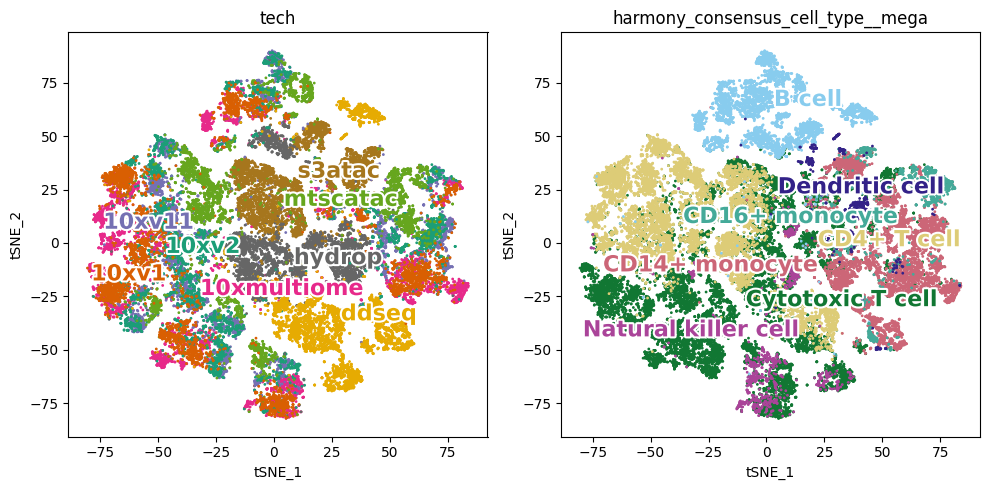

In [44]:
plot_metadata(
    cto,
    reduction_name="tSNE",
    num_columns=2,
    variables=["tech", "harmony_consensus_cell_type__mega"],
    target="cell",
    text_size=16,
    dot_size=1,
    figsize=(10, 5),
    color_dictionary=color_dict,
    save=f"plots_qc/{sample}__tsne_summary.png",
)

2023-02-16 16:20:49,744 matplotlib.font_manager INFO     Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2023-02-16 16:20:49,747 matplotlib.font_manager INFO     Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2023-02-16 16:20:49,748 matplotlib.font_manager INFO     Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2023-02-16 16:20:49,749 matplotlib.font_manager INFO     Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2023-02-16 16:20:49,751 matplotlib.font_manager INFO     Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2023-02-16 16:20:49,752 matplotlib.font_manager INFO     Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2023-02-16 16:20:49,753 matplotlib.font_manager INFO     Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
2023-02-16 16:20:49,755 matplotlib.font_manager INFO     Fontsize 0.00 < 1.0 pt not allowed by Fr

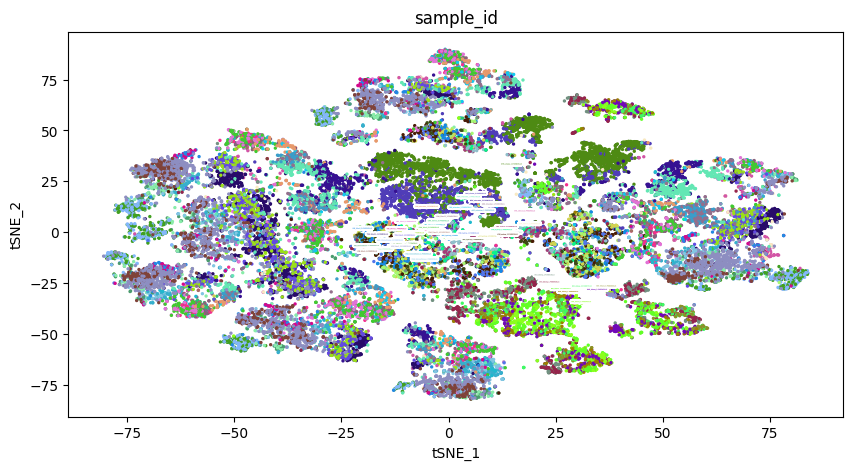

In [45]:
plot_metadata(
    cto,
    reduction_name="tSNE",
    num_columns=1,
    variables=["sample_id"],
    target="cell",
    text_size=0,
    dot_size=2,
    figsize=(10, 5)
    # save=f"plots_qc/{sample}__tsne_summary.png",
)

# calculate harmony

In [46]:
from pycisTopic.clust_vis import harmony

In [47]:
harmony(cto, "tech", random_state=555, max_iter_harmony=20)

2023-02-16 16:20:58,935 - harmonypy - INFO - Iteration 1 of 20


2023-02-16 16:20:58,935 harmonypy    INFO     Iteration 1 of 20


2023-02-16 16:21:07,232 - harmonypy - INFO - Iteration 2 of 20


2023-02-16 16:21:07,232 harmonypy    INFO     Iteration 2 of 20


2023-02-16 16:21:14,812 - harmonypy - INFO - Iteration 3 of 20


2023-02-16 16:21:14,812 harmonypy    INFO     Iteration 3 of 20


2023-02-16 16:21:22,454 - harmonypy - INFO - Iteration 4 of 20


2023-02-16 16:21:22,454 harmonypy    INFO     Iteration 4 of 20


2023-02-16 16:21:30,243 - harmonypy - INFO - Iteration 5 of 20


2023-02-16 16:21:30,243 harmonypy    INFO     Iteration 5 of 20


2023-02-16 16:21:38,459 - harmonypy - INFO - Converged after 5 iterations


2023-02-16 16:21:38,459 harmonypy    INFO     Converged after 5 iterations


In [48]:
cto.cell_names = cto.cell_data.index
leiden_res = [3.0]
# cto.projections["cell"] = {}
find_clusters(
    cto,
    target="cell",
    k=10,
    res=leiden_res,
    prefix="harmony_pycisTopic_celltypefair",
    harmony=True,
)
run_umap(cto, target="cell", reduction_name="UMAP_harmony", harmony=True)
run_tsne(cto, target="cell", reduction_name="tSNE_harmony", harmony=True)

2023-02-16 16:21:38,478 cisTopic     INFO     Finding neighbours
2023-02-16 16:21:46,393 cisTopic     INFO     Running UMAP
2023-02-16 16:22:19,376 cisTopic     INFO     Running FItSNE

Symmetrizing...
Using the given initialization.
Exaggerating Ps by 12.000000
Input similarities computed (sparsity = 0.003928)!
Learning embedding...
Using FIt-SNE approximation.
Iteration 50 (50 iterations in 1.72 seconds), cost 5.048492
Iteration 100 (50 iterations in 1.65 seconds), cost 4.555613
Iteration 150 (50 iterations in 1.20 seconds), cost 4.455493
Iteration 200 (50 iterations in 1.48 seconds), cost 4.357720
Iteration 250 (50 iterations in 1.59 seconds), cost 4.343389
Unexaggerating Ps by 12.000000
Iteration 300 (50 iterations in 1.46 seconds), cost 3.463085
Iteration 350 (50 iterations in 1.50 seconds), cost 2.958546
Iteration 400 (50 iterations in 1.78 seconds), cost 2.772635
Iteration 450 (50 iterations in 1.67 seconds), cost 2.638454
Iteration 500 (50 iterations in 2.74 seconds), cost 2.56

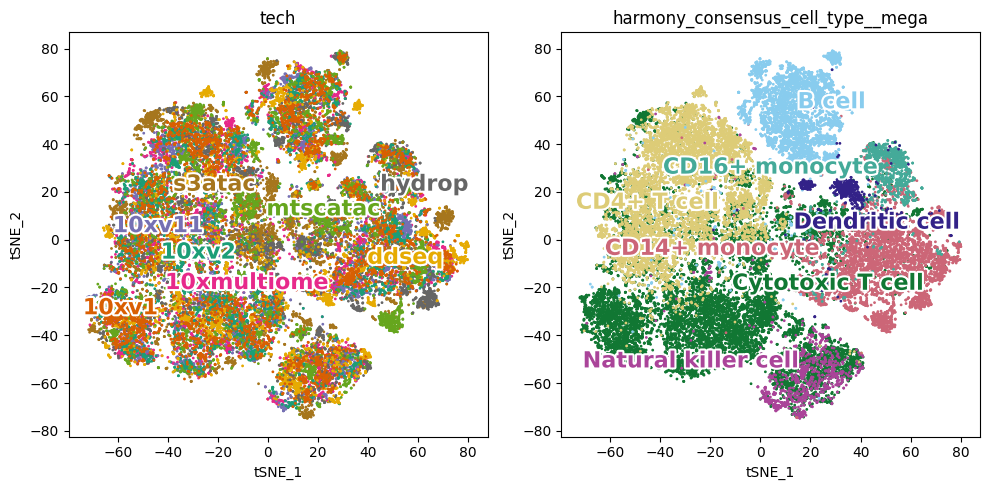

In [49]:
plot_metadata(
    cto,
    reduction_name="tSNE_harmony",
    num_columns=2,
    variables=["tech", "harmony_consensus_cell_type__mega"],
    target="cell",
    text_size=16,
    dot_size=1,
    figsize=(10, 5),
    color_dictionary=color_dict,
    save=f"plots_qc/{sample}__harmony_tsne_summary.png",
)

In [50]:
cto_path_new

'cistopic_objects/master_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_28topics.dimreduc.pkl'

In [51]:
cto_path

'cistopic_objects/master_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_28topics.pkl'

In [52]:
cto_path_new = "cistopic_objects/master_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_28topics.dimreduc.pkl".replace(
    ".pkl", ".consensus_harmony.pkl"
)
with open(cto_path_new, "wb") as f:
    pickle.dump(cto, f, protocol=4)

In [55]:
for key in cto.projections["cell"].keys():
    print(key)
    for column in cto.projections["cell"][key].columns:
        print(column)
        dim = list(cto.projections["cell"][key].columns).index(column) + 1
        print(f"\t{key}_{dim}")
        cto.cell_data[f"{key}_{dim}"] = cto.projections["cell"][key][column]

UMAP
UMAP_1
	UMAP_1
UMAP_2
	UMAP_2
tSNE
tSNE_1
	tSNE_1
tSNE_2
	tSNE_2
UMAP_harmony
UMAP_1
	UMAP_harmony_1
UMAP_2
	UMAP_harmony_2
tSNE_harmony
tSNE_1
	tSNE_harmony_1
tSNE_2
	tSNE_harmony_2


In [56]:
cto.cell_data.to_csv(
    "cistopic_objects/master_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_28topics.dimreduc.consensus_harmony.cell_data.csv"
)

# nice plot

In [61]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}


cell_type_color_dict = {
    "B_cell": "#117733",
    "CD14+_monocyte": "#DDCC77",
    "CD4+_T_cell": "#CC6677",
    "Cytotoxic_T_cell": "#88CCEE",
    "Dendritic_cell": "#44AA99",
    "Natural_killer_cell": "#332288",
    "CD16+_monocyte": "#AA4499",
}
tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv11c": "10x v1.1 (control)",
    "10xv2": "10x v2",
    "ddseq": "Bio-Rad ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "mtscatacfacs": "mtscATAC-seq (FACS)",
    "s3atac": "s3-ATAC",
}
cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD14+_monocyte",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Dendritic_cell",
    "Natural_killer_cell",
    "CD16+_monocyte",
]

In [65]:
variables = ["tech", "harmony_consensus_cell_type__mega"]
color_dict_dict = {}
color_dict_dict["tech"] = tech_color_palette
color_dict_dict["harmony_consensus_cell_type__mega"] = cell_type_color_dict

alias_dict_dict = {}
alias_dict_dict["tech"] = tech_alias_dict
alias_dict_dict["harmony_consensus_cell_type__mega"] = cell_type_alias_dict

order_dict_dict = {}
order_dict_dict["tech"] = tech_order
order_dict_dict["harmony_consensus_cell_type__mega"] = cell_type_order

In [66]:
variable_alias_dict = {
    "tech": "Technology",
    "harmony_consensus_cell_type__mega": "Cell type",
}

tech
harmony_consensus_cell_type__mega


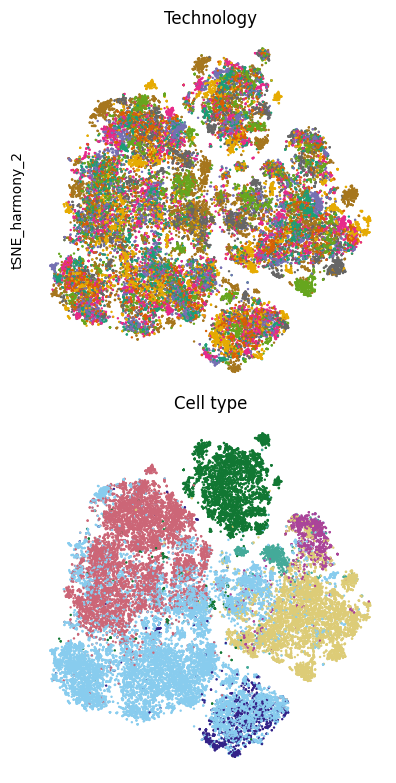

In [68]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(6, 8))
fig.tight_layout()
axes = axes.flatten()

df = pd.read_csv(
    "cistopic_objects/master_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_28topics.dimreduc.consensus_harmony.cell_data.csv",
    index_col=0,
)
for variable in variables:
    print(variable)

    df["harmony_consensus_cell_type__mega"] = [
        x.replace(" ", "_") for x in df["harmony_consensus_cell_type__mega"]
    ]
    df = df.sample(
        frac=1
    )  # shuffle rows so that no cell type is biased to be displayed above another one

    ax = axes[variables.index(variable)]

    sns.scatterplot(
        data=df,
        x="tSNE_harmony_1",
        y="tSNE_harmony_2",
        hue=variable,
        s=3,
        linewidth=0,
        ax=ax,
        legend=False,
        palette=color_dict_dict[variable],
    )

    # ax.get_legend().remove()
    # ax.set(adjustable="box", aspect="equal")
    ax.set_aspect("equal")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.title.set_text(variable_alias_dict[variable])
    sns.despine(left=True, bottom=True)

plt.savefig(
    "plts_final/tSNE_all.png",
    dpi=900,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/tSNE_all.svg",
    dpi=900,
    facecolor="white",
    bbox_inches="tight",
)

# calculate LISI

In [27]:
from harmonypy.lisi import compute_lisi
import seaborn as sns
import math

In [30]:
cto.cell_data["UMAP_1"] = cto.projections["cell"]["UMAP"]["UMAP_1"]
cto.cell_data["UMAP_2"] = cto.projections["cell"]["UMAP"]["UMAP_2"]

cto.cell_data["tSNE_1"] = cto.projections["cell"]["tSNE"]["tSNE_1"]
cto.cell_data["tSNE_2"] = cto.projections["cell"]["tSNE"]["tSNE_2"]

cto.cell_data["harmony_UMAP_1"] = cto.projections["cell"]["UMAP_harmony"]["UMAP_1"]
cto.cell_data["harmony_UMAP_2"] = cto.projections["cell"]["UMAP_harmony"]["UMAP_2"]

cto.cell_data["harmony_tSNE_1"] = cto.projections["cell"]["tSNE_harmony"]["tSNE_1"]
cto.cell_data["harmony_tSNE_2"] = cto.projections["cell"]["tSNE_harmony"]["tSNE_2"]

In [31]:
cto.cell_data["center"] = [x.split("_")[0] for x in cto.cell_data["sample_id"]]

In [32]:
cto.cell_data["tech_center"] = cto.cell_data["tech"] + "_" + cto.cell_data["center"]

In [35]:
dimreduc_list = ["tSNE", "UMAP", "UMAP_harmony", "tSNE_harmony"]
var_list = [
    "sample_id",
    "tech",
    "center",
    "tech_center",
    "harmony_consensus_cell_type__mega",
]

for dimreduc in dimreduc_list:
    for var in var_list:
        if not f"{dimreduc}_LISI_by_{var}" in cto.cell_data.columns:
            lisi = compute_lisi(
                cto.projections["cell"][dimreduc].to_numpy(),
                metadata=cto.cell_data,
                label_colnames=[var],
            )
            cto.cell_data[f"{dimreduc}_LISI_by_{var}"] = lisi
        else:
            print(f"{dimreduc}_LISI_by_{var} already in columns")

tSNE_LISI_by_sample_id already in columns
tSNE_LISI_by_tech already in columns
tSNE_LISI_by_center already in columns
tSNE_LISI_by_tech_center already in columns
tSNE_LISI_by_harmony_consensus_cell_type__mega already in columns
UMAP_LISI_by_sample_id already in columns
UMAP_LISI_by_tech already in columns
UMAP_LISI_by_center already in columns
UMAP_LISI_by_tech_center already in columns
UMAP_LISI_by_harmony_consensus_cell_type__mega already in columns


In [ ]:
cto.cell_data.to_csv(
    "cistopic_objects/master_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_28topics.dimreduc.consensus.cell_data.csv",
    index=True,
    header=True,
)

In [ ]:
with open(
    "cistopic_objects/master_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_28topics.dimreduc.consensus.pkl",
    "wb",
) as f:
    pickle.dump(cto, f, protocol=4)

In [ ]:
df = pd.read_csv(
    "cistopic_objects/master_celltypefair_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_28topics.dimreduc.consensus.cell_data.tsv",
    sep="\t",
    index_col=0,
    header=0,
)

In [ ]:
df

### Combined plot

In [ ]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}


tech_alias_order = [
    "10x v1",
    "10x v1.1",
    "10x v2",
    "10x Multiome",
    "mtscATAC-seq",
    "ddSEQ SureCell",
    "s3-ATAC",
    "HyDrop",
]

tech_alias_color_palette = {
    tech_alias_dict[x]: tech_color_palette[x] for x in tech_color_palette.keys()
}

In [ ]:
df_sub1 = pd.DataFrame()
df_sub1["LISI"] = df["tSNE_LISI_by_tech"]
df_sub1["harmony"] = "pre-Harmony"

df_sub2 = pd.DataFrame()
df_sub2["LISI"] = df["harmony_tSNE_LISI_by_tech"]
df_sub2["harmony"] = "post-Harmony"

df_merged = pd.concat([df_sub1, df_sub2])

In [ ]:
df_merged["Technology"] = [
    tech_alias_dict[x.split("___")[1].split("_")[1]] for x in df_merged.index
]
df_merged.reset_index(inplace=True, drop=True)

In [ ]:
sns.boxplot(
    df_merged,
    y="LISI",
    x="harmony",
    hue="Technology",
    showfliers=False,
    hue_order=tech_alias_order,
    palette=tech_alias_color_palette,
)
plt.xticks(rotation=0, ha="center")
plt.xlabel(None)
plt.savefig("plts_final/LISI_bytech_pre_post_harmony.png", dpi=600, facecolor="white")
plt.savefig("plts_final/LISI_bytech_pre_post_harmony.svg", dpi=600, facecolor="white")

In [ ]:
df.columns

In [ ]:
sns.scatterplot(
    df,
    x="harmony_tSNE_1",
    y="harmony_tSNE_2",
    s=1,
    linewidth=0,
    hue="seurat_cell_type",
)

In [ ]:
sns.scatterplot(
    df, x="harmony_tSNE_1", y="harmony_tSNE_2", s=1, linewidth=0, hue="tech"
)